# Prosper Loans Data Exploration
## by Shayma albzour

## Investigation Overview


>The primary goal of this analysis is to develop a comprehensive understanding of the key factors driving the dynamics within the loan portfolio. Specifically, we aim to explore the relationships between the core loan variables, including Loan Original Amount, LP_CustomerPrincipalPayments, MonthlyLoanPayment, Debt-to-Income Ratio, Stated Monthly Income, Employment Status, and Income Range.


## Dataset Overview

>The loan dataset includes information on customers with varying loan repayment statuses. It contains data on customers who have fully paid off their loans, those who have been delinquent and sent to collections without completing repayment, as well as customers who have only paid off their loans after being sent to collections. The original dataset had 113,937 rows and 81 columns

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
pip install nbconvert


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# load in the dataset into a pandas dataframe
df= pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


## How does the original loan amount influence the monthly payment for borrowers, and is there a consistent proportional relationship between the two variables across different loan sizes?

>There is a **positive linear relationship between the Monthly Loan Payment and the Loan Original Amount**. As the monthly loan payment increases, the corresponding loan original amount also increases.  
The plot reveals several outliers, particularly at the higher end of the monthly loan payment and loan original amount. 

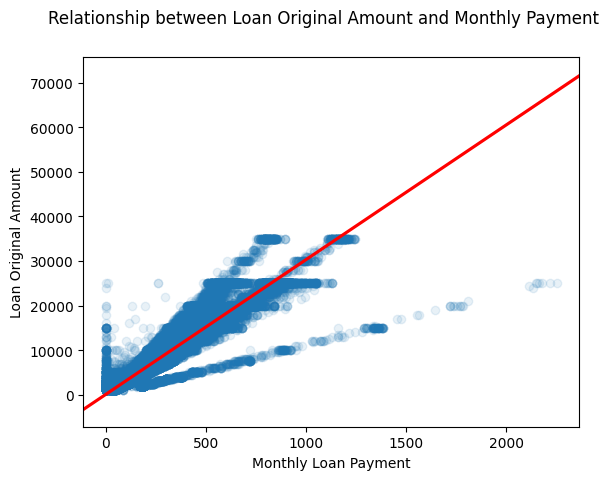

In [4]:
# Create a scatter plot with a regression line
sns.regplot(data=df, x='MonthlyLoanPayment', y='LoanOriginalAmount',line_kws={'color': 'red'},truncate=False, x_jitter=0.9, scatter_kws={'alpha':1/10});
plt.suptitle("Relationship between Loan Original Amount and Monthly Payment")
# Label axes
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Loan Original Amount');

## How do the key loan variables, such as Loan Original Amount, Customer Principal Payments, Monthly Loan Payment, Debt-to-Income Ratio, and Stated Monthly Income, relate to each other, and how do these relationships vary across different loan status categories?

> - Loan Original Amount has a positive relationship with both LP_CustomerPrincipalPayments and MonthlyLoanPayment. 
This indicates that as the Loan Original Amount increases, the Customer Principal Payments and Monthly Loan Payment also tend to increase.
MonthlyLoanPayment also has a positive relationship with LP_CustomerPrincipalPayments.
This suggests that higher Monthly Loan Payments are associated with higher Customer Principal Payments.  
> - Debt-to-Income Ratio and Stated Monthly Income appear to have negative relationships with almost all the other loan variables.  
> - It highlights the presence of outliers across multiple variables, which could have a significant impact on the analysis.  
Outliers are observed in the scatter plots for Loan Original Amount, LP_CustomerPrincipalPayments, MonthlyLoanPayment, and Debt-to-Income Ratio.
These outliers represent data points that deviate significantly from the main clusters or patterns of the other observations.

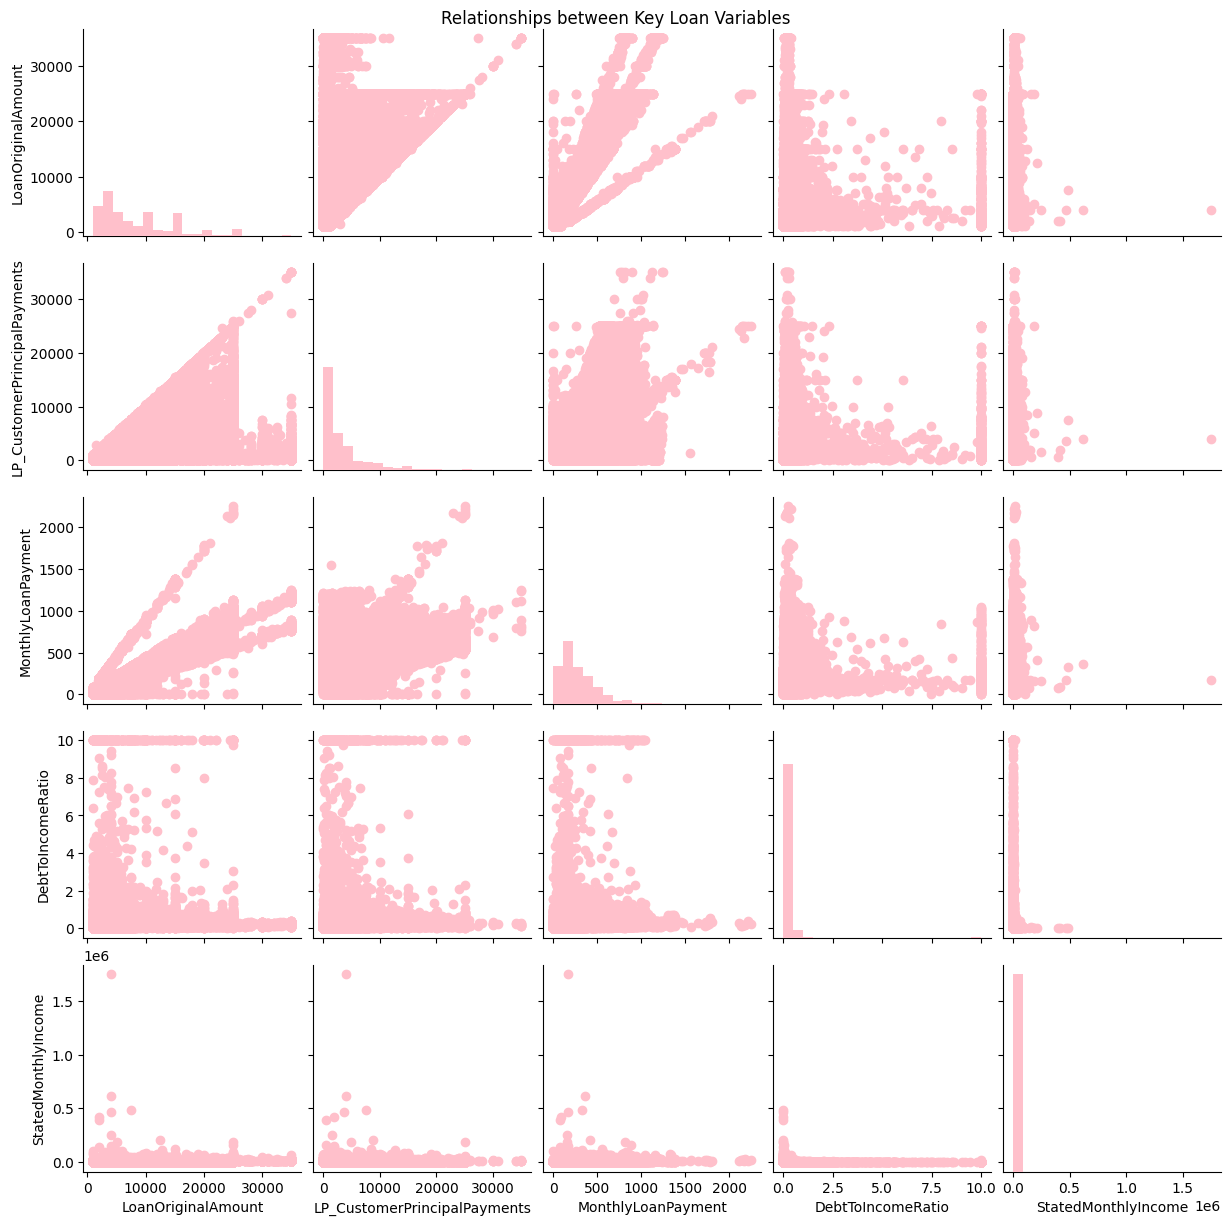

In [5]:
key_vars=['LoanOriginalAmount', 'LP_CustomerPrincipalPayments',
       'MonthlyLoanPayment', 'DebtToIncomeRatio', 'StatedMonthlyIncome']

## this list is the natural order of loan status
loan_status_order = [ 'Completed','FinalPaymentInProgress','Current', 'Past Due','Chargedoff','Defaulted']

grid = sns.PairGrid(data = df, vars = key_vars )
grid.map_diag(plt.hist, bins = 20,color='pink')
grid.map_offdiag(plt.scatter,color='pink')
grid.fig.suptitle("Relationships between Key Loan Variables")
grid.tight_layout();

##  What is the distribution of income verifiability among the dataset?

>The True category has a significantly higher count than the False category. This indicates that most of the entries in the dataset have verifiable income.The count for True is approximately over 100,000, whereas the count for False is considerably lower, likely under 20,000.

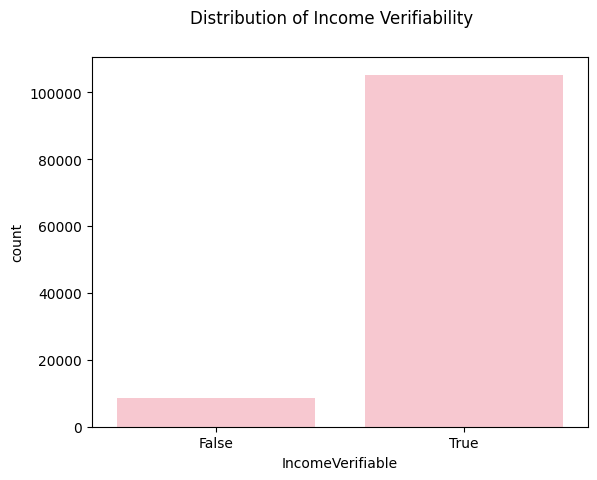

In [6]:
# Calculate the counts for each category
IncomeVerifiable_counts = df['IncomeVerifiable'].value_counts()

# Get the categories in order from lowest to highest count
order = IncomeVerifiable_counts.sort_values().index

# Plotting with the determined order
sns.countplot(data=df, x='IncomeVerifiable', color='pink', order=order);
plt.suptitle("Distribution of Income Verifiability");

In [ ]:
!jupyter nbconvert Part_2_slide.ipynb --to slides --no-input --no-prompt --post serve


[NbConvertApp] Converting notebook Part_2_slide.ipynb to slides
[NbConvertApp] Writing 275036 bytes to Part_2_slide.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_2_slide.slides.html
Use Control-C to stop this server
[NbConvertApp] WARNING | No web browser found: could not locate runnable browser.
